# XGBoost
Kaggle Intermediate Machine Learning exercises: https:
//www.kaggle.com/code/soyoungchoe/exercise-xgboost/edit


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('train.csv')
X_test_full = pd.read_csv('test.csv')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                               random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                       X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

## One-hot encode
- X_train = pd.get_dummies(X_train): This line uses the get_dummies function from the pandas library to perform one-hot encoding on the categorical variables in the DataFrame X_train. One-hot encoding converts categorical variables into a binary matrix representation, making them suitable for machine learning algorithms.
- X_train, X_valid = X_train.align(X_valid, join='left', axis=1): This line aligns the columns of the one-hot encoded training dataset (X_train) and the one-hot encoded validation dataset (X_valid). The align method ensures that both DataFrames have the same set of columns, and it fills in missing columns in the left DataFrame (X_train) with NaN values. The parameter join='left' specifies that it should keep all columns from the left DataFrame.

This following code is essentially preparing the input data for a machine learning model by one-hot encoding categorical variables and ensuring that the training, validation, and test datasets have the same set of columns for consistent model training and evaluation.

In [4]:
# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

## Build XGBoost model and check mean absolute error

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define the model
my_model_1 = XGBRegressor(random_state=0)

# Fit the model
my_model_1.fit(X_train, y_train)

# Get preditions
predictions_1 = my_model_1.predict(X_valid)

# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid)

print("Mean Absolute Error:", mae_1)

Mean Absolute Error: 18572.31490796233


## Evaluate the best mae

From this point, I evaluated my best n_estimators to find the lowest MAE with different method than Kaggle course. I defined get_score to get mae for my model and used plot to see visually how mae changes and get the best n_estimator value, which is 200 according to the graph. (I tried this way for fun. Visualizing the results are more entertaining for me)
In the Kaggle course, they tried to change parametors to see how mae changes. This teaches me how I can get worse mae by setting the n_estimators=1. (It was fun, too)

In [11]:
def get_score(i_estimators):
    my_model_2 = XGBRegressor(n_estimators=i_estimators)
    my_model_2.fit(X_train,y_train)
    predictions_2 = my_model_2.predict(X_valid)
    mae_2 = mean_absolute_error(predictions_2, y_valid)
    return mae_2

results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

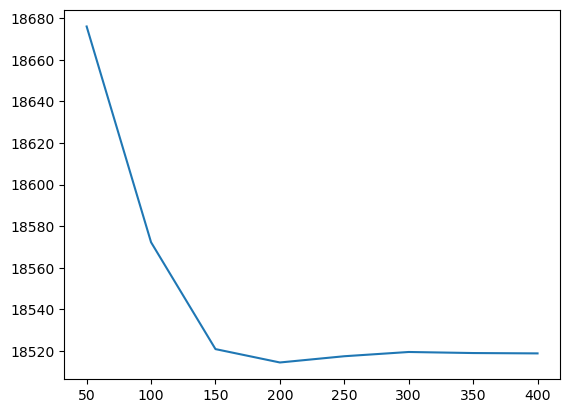

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()